In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

# import du fichier
df = pd.read_csv('rains.csv')

# Affichage des premières leignes du fichier
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Newcastle,13.2,NaN,0.0,NaN,NaN,NaN,NaN,NW,...,50.0,24.0,NaN,NaN,3.0,4.0,21.8,30.6,No,No
1,2008-12-02,Newcastle,NaN,32.2,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,59.0,NaN,NaN,NaN,0.0,NaN,25.4,No,No
2,2008-12-03,Newcastle,16.2,32.2,0.0,NaN,NaN,NaN,NaN,N,...,74.0,26.0,NaN,NaN,4.0,4.0,22.2,32.0,No,No
3,2008-12-04,Newcastle,19.2,24.0,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,61.0,NaN,NaN,7.0,5.0,20.4,23.0,No,No
4,2008-12-05,Newcastle,18.8,30.2,0.0,NaN,NaN,NaN,NaN,NE,...,85.0,NaN,NaN,NaN,8.0,NaN,20.0,NaN,No,No


In [230]:
# Analyse de la structure du fichier
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25631 entries, 0 to 25630
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           25631 non-null  object 
 1   Location       25631 non-null  object 
 2   MinTemp        24781 non-null  float64
 3   MaxTemp        24885 non-null  float64
 4   Rainfall       24570 non-null  float64
 5   Evaporation    16385 non-null  float64
 6   Sunshine       16142 non-null  float64
 7   WindGustDir    21009 non-null  object 
 8   WindGustSpeed  21011 non-null  float64
 9   WindDir9am     23020 non-null  object 
 10  WindDir3pm     23947 non-null  object 
 11  WindSpeed9am   25073 non-null  float64
 12  WindSpeed3pm   24389 non-null  float64
 13  Humidity9am    24800 non-null  float64
 14  Humidity3pm    24141 non-null  float64
 15  Pressure9am    21854 non-null  float64
 16  Pressure3pm    21852 non-null  float64
 17  Cloud9am       16480 non-null  float64
 18  Cloud3

### Correspondance des colonnes

Date est une date
Location est une chaine de caractère correspondant au lieu de mesure
WindGustDir
WindGustDir9am est une chaine de caractères difinissant la direction du vent à 9h du matin
WindGustDur3pm est une chaine de caractères difinissant la direction du vent à 9h du matin

RainTomorraow est une chaine de caractères définissant si il a plu le jour de la mesure
RainTomorraow est une chaine de caractères définissant si il a plu le lendemain

Le lieu et la date sont des valeurs à conserver telles que définies

Les directions du vents sont à analyser

Les colonnes RainToday et RainTomorrow sont à convertir


### Recherche du nombre de lignes et de colonnes

In [231]:
# Recherche du nombre de lignes
print('nombre de colonnes :', df.shape[1], 'nombre de lignes : ', df.shape[1])

nombre de colonnes : 23 nombre de lignes :  23


### Description numérique des différentes colonnes

In [232]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,24781.000000,24885.000000,24570.000000,16385.000000,16142.000000,21011.000000,25073.000000,24389.000000,24800.000000,24141.000000,21854.000000,21852.000000,16480.000000,15527.000000,24883.000000,24183.000000
mean,13.255958,23.627928,2.568637,5.180128,7.598346,38.323021,12.250668,17.501989,66.912621,51.880742,1018.254873,1015.802009,4.214078,4.237264,17.850520,22.018224
std,5.828184,5.911984,8.955230,3.421251,3.796346,13.483681,9.282323,9.349560,16.448132,17.757020,6.786389,6.637024,2.858866,2.699229,5.931133,5.722596
min,-8.000000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000,982.300000,985.500000,0.000000,0.000000,-1.300000,3.700000
25%,9.500000,19.400000,0.000000,2.600000,4.800000,30.000000,6.000000,11.000000,56.000000,40.000000,1013.700000,1011.300000,1.000000,1.000000,13.600000,18.000000
50%,13.500000,23.500000,0.000000,4.600000,8.500000,37.000000,11.000000,17.000000,67.000000,52.000000,1018.200000,1015.800000,5.000000,5.000000,17.800000,21.900000
75%,17.600000,27.700000,0.800000,7.200000,10.500000,46.000000,17.000000,22.000000,78.000000,63.000000,1022.800000,1020.300000,7.000000,7.000000,22.300000,25.900000
max,33.900000,46.400000,240.000000,44.000000,13.900000,122.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,39.000000,45.400000


### Conversion des valeurs binaires

In [233]:
# Recherche des valeurs existantes dans la colonne RainToday
pd.unique(df['RainToday'])

array(['No', 'Yes', nan], dtype=object)

In [234]:
# Recherche des valeurs existantes dans la colonne RainTomorrow
pd.unique(df['RainTomorrow'])

array(['No', 'Yes', nan], dtype=object)

In [235]:
# recherche du nombre de valeurs à 'nan'
df['RainToday'].value_counts()

No     18890
Yes     5680
Name: RainToday, dtype: int64

Il y a donc 18890 valeurs à NO et 5680 valeurs à YES. 24570 lignes ont une valeurs  
Les lignes avec la valeur 'non' seront supprimées car elles ne permettront pas de faire d'estimation  
  
Le même traitement sera effectué pour la colonne RainTomorrow

In [236]:
df = df[df['RainToday'].notna()]

In [237]:
df = df[df['RainTomorrow'].notna()]

Conversion des données des colonnes RainToday et RainTomorrow

In [238]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [239]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Newcastle,13.2,NaN,0.0,NaN,NaN,NaN,NaN,NW,...,50.0,24.0,NaN,NaN,3.0,4.0,21.8,30.6,0,0
1,2008-12-02,Newcastle,NaN,32.2,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,59.0,NaN,NaN,NaN,0.0,NaN,25.4,0,0
2,2008-12-03,Newcastle,16.2,32.2,0.0,NaN,NaN,NaN,NaN,N,...,74.0,26.0,NaN,NaN,4.0,4.0,22.2,32.0,0,0
3,2008-12-04,Newcastle,19.2,24.0,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,61.0,NaN,NaN,7.0,5.0,20.4,23.0,0,0
4,2008-12-05,Newcastle,18.8,30.2,0.0,NaN,NaN,NaN,NaN,NE,...,85.0,NaN,NaN,NaN,8.0,NaN,20.0,NaN,0,0


### Décompte des valeurs non disponibles

In [240]:
df.isna().sum()

valeurs_manquantes=df.isnull().sum() # missing values

pourcentage_manquant = df.isnull().sum()/df.shape[0]*100 # missing value %

valeurs = {
    'Valeurs manquantes ':valeurs_manquantes,
    'Pourcentage de valeurs manquantes':pourcentage_manquant
}
pd.DataFrame(valeurs)


,Valeurs manquantes,Pourcentage de valeurs manquantes
Date,0,0.000000
Location,0,0.000000
MinTemp,274,1.130876
MaxTemp,166,0.685129
Rainfall,0,0.000000
Evaporation,8882,36.658550
Sunshine,9189,37.925626
WindGustDir,4395,18.139420
WindGustSpeed,4393,18.131165
WindDir9am,2458,10.144868


On peut cnstater que les colonnes Evaporation, Sunshine, Cloud9am et Cloud3pm ont beaucoup de valeurs non disponibles  
Ces données ne seront pas prises en compte car utiliser une moyenne ou un mode ne sera pas représentatif  

In [241]:
df = df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis=1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Newcastle,13.2,NaN,0.0,NaN,NaN,NW,NW,6.0,19.0,50.0,24.0,NaN,NaN,21.8,30.6,0,0
1,2008-12-02,Newcastle,NaN,32.2,0.0,NaN,NaN,NaN,NE,NaN,19.0,NaN,59.0,NaN,NaN,NaN,25.4,0,0
2,2008-12-03,Newcastle,16.2,32.2,0.0,NaN,NaN,N,SE,2.0,2.0,74.0,26.0,NaN,NaN,22.2,32.0,0,0
3,2008-12-04,Newcastle,19.2,24.0,0.0,NaN,NaN,SE,SE,22.0,22.0,66.0,61.0,NaN,NaN,20.4,23.0,0,0
4,2008-12-05,Newcastle,18.8,30.2,0.0,NaN,NaN,NE,NaN,4.0,NaN,85.0,NaN,NaN,NaN,20.0,NaN,0,0


### Remplacement des valeurs vides

Les valeurs numériques seront remplacées par les moyennes de la colonnes  
Les autres seront remplacées par leur mode

A noter que les valeurs des colonnes RainToday et RainTomorrow ont déjà été traitées

In [242]:
df["MinTemp"]= df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"]= df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["WindGustSpeed"]= df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
df["Rainfall"]= df["Rainfall"].fillna(df["Rainfall"].mean())
df["WindSpeed9am"]= df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"]= df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"]= df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"]= df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"]= df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"]= df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Temp9am"]= df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]= df["Temp3pm"].fillna(df["Temp3pm"].mean())

In [243]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [244]:
# Recherche de valeurs non nulles
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Recherche des différentes valeurs disponibles dans les colonnes qui ne sont pas numériques

In [245]:
colonnes = ['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [246]:
liste_valeurs={}
for col in colonnes:
    liste_valeurs[col]=df[col].unique()
    print(liste_valeurs[col])

['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
['Newcastle' 'Sydney' 'Canberra' 'Melbourne' 'Brisbane' 'GoldCoast'
 'Adelaide' 'Perth']
['SSE' 'ESE' 'ENE' 'NNE' 'NNW' 'WNW' 'W' 'NW' 'SSW' 'NE' 'WSW' 'SE' 'SW'
 'N' 'E' 'S']
['NW' 'W' 'N' 'SE' 'NE' 'SW' 'S' 'SSE' 'WSW' 'WNW' 'NNW' 'ESE' 'E' 'SSW'
 'NNE' 'ENE']
['NW' 'NE' 'SE' 'SW' 'N' 'WSW' 'S' 'ESE' 'W' 'E' 'NNW' 'SSE' 'SSW' 'ENE'
 'NNE' 'WNW']
[0 1]
[0 1]


Les données liées à la direction du vent ainsi que la localisation ne peuvent pas être utilisées telles qu'elles sont présntées dans le dataframe car ce ne sont pas des données numériques    
On va donc leur assigner une valeur pour chacun des cas.  
  
Pour faire cela, on utilise une fonction de la librairie scikit learn

In [247]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,5,13.200000,23.688156,0.0,10,37.980792,7,7,6.000000,19.00000,50.000000,24.000000,1018.278236,1015.808518,21.800000,30.600000,0,0
1,2008-12-02,5,13.269727,32.200000,0.0,10,37.980792,13,4,11.976355,19.00000,66.885241,59.000000,1018.278236,1015.808518,17.895243,25.400000,0,0
2,2008-12-03,5,16.200000,32.200000,0.0,10,37.980792,3,9,2.000000,2.00000,74.000000,26.000000,1018.278236,1015.808518,22.200000,32.000000,0,0
3,2008-12-04,5,19.200000,24.000000,0.0,10,37.980792,9,9,22.000000,22.00000,66.000000,61.000000,1018.278236,1015.808518,20.400000,23.000000,0,0
4,2008-12-05,5,18.800000,30.200000,0.0,10,37.980792,4,9,4.000000,17.27357,85.000000,51.840444,1018.278236,1015.808518,20.000000,22.073996,0,0


### Recherche de valeurs fortement correlées

Nous utiliseront une heatmap pour analyser la correlation entre les différentes valeurs

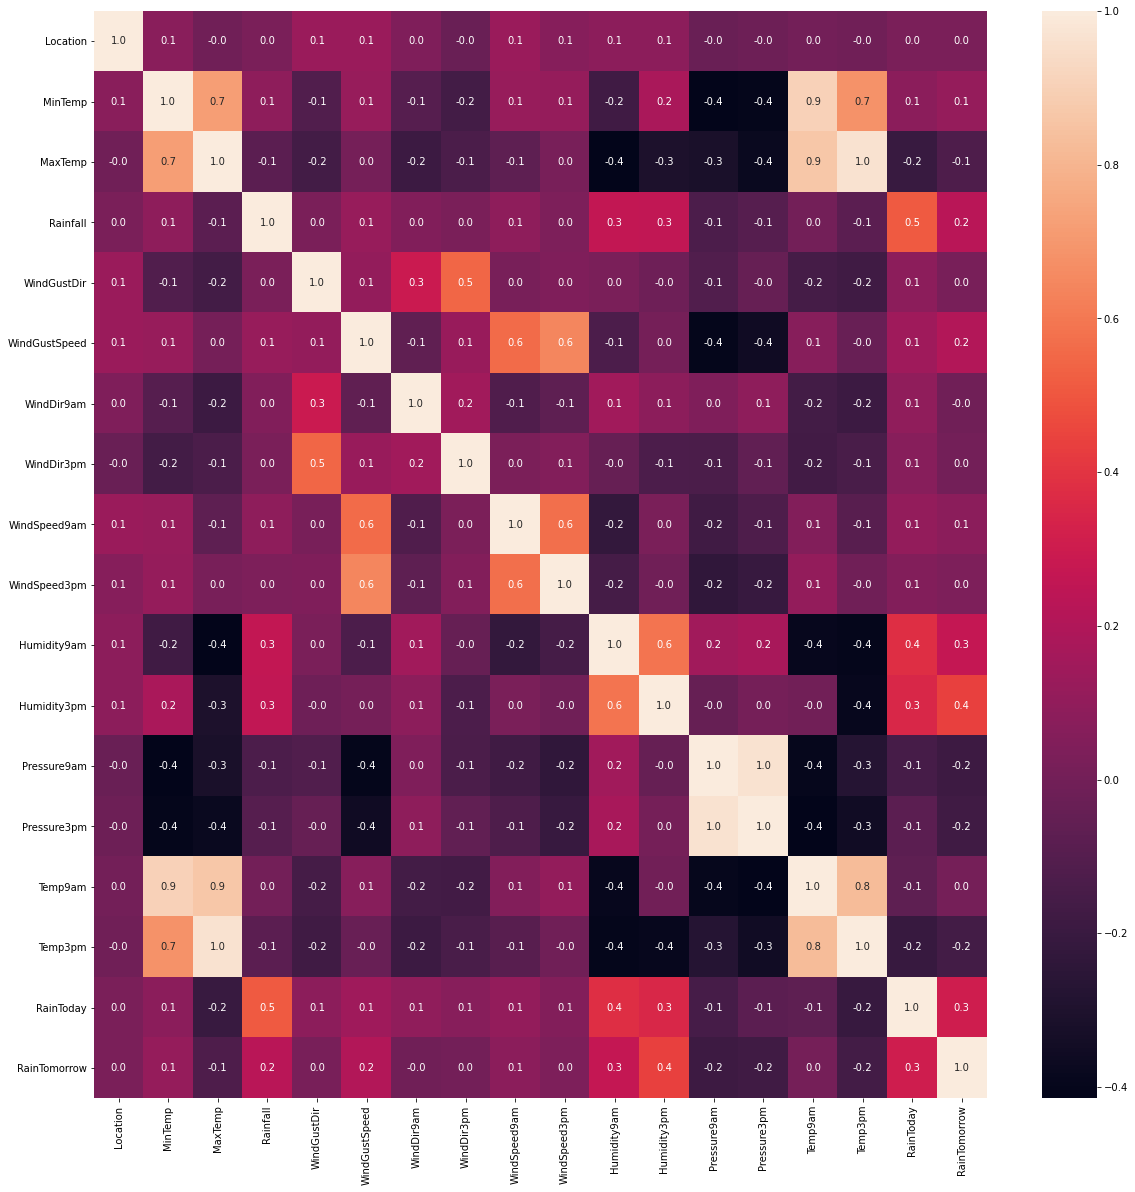

In [248]:
# Calcul des correlations
corr = df.corr()

# Création d'une figure de 20 * 20
plt.figure(figsize=(20, 20))

# Création de la heatmap à partir des données de correlation
sns.heatmap(corr, annot=True,fmt = '.1f');

La heatmap nous permet de constater que les données qui sont mesurées au court de la journée sont fortement correlées entre elles. C'est à dire les données des températures, des vents, humidité et des pressions  
  
On voit également que la température maximale correspond à la température mesurées à 3 heure. Sachant celà, la colonne Temp3pm sera supprimée  
La colonne Date n'a pas de plus value pour la recherche, elle sera également supprimée

In [249]:
df = df.drop(['Temp3pm'], axis=1)
df = df.drop(['Date'], axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,RainToday,RainTomorrow
0,5,13.200000,23.688156,0.0,10,37.980792,7,7,6.000000,19.00000,50.000000,24.000000,1018.278236,1015.808518,21.800000,0,0
1,5,13.269727,32.200000,0.0,10,37.980792,13,4,11.976355,19.00000,66.885241,59.000000,1018.278236,1015.808518,17.895243,0,0
2,5,16.200000,32.200000,0.0,10,37.980792,3,9,2.000000,2.00000,74.000000,26.000000,1018.278236,1015.808518,22.200000,0,0
3,5,19.200000,24.000000,0.0,10,37.980792,9,9,22.000000,22.00000,66.000000,61.000000,1018.278236,1015.808518,20.400000,0,0
4,5,18.800000,30.200000,0.0,10,37.980792,4,9,4.000000,17.27357,85.000000,51.840444,1018.278236,1015.808518,20.000000,0,0


### Préparation des jeux d'entrainement et de test
Les données seront séparées en deux jeux de données. Le premier sera le jeu d'entrainement composé de 75% des valeurs. L'autre jeu sera utilisé pour le reste et sera composé de 25% des données restantes

In [250]:
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

In [251]:
# définition du nombre de jeux de données pour les entrainements
# /!\ On va s'appuyer sur la fonction range tout au long du projet. Donc la valeur de nbrEntrainement vaut un de plus que le 
# nombre d'otérations. Quand nbrEntrainement vaut 5, il y a 4 itérations
nbrEntrainement = 5

In [252]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.25)

# création de plusieurs jeux de données pour tests et entrainements.
# ceci afin d'améliorer la comparaison des modèles

X_trains = []
X_tests = []
y_trains = []
y_tests = []

X_tr = []
X_te = []
y_tr = []
y_te = []
for i in range(1, nbrEntrainement):
    random = i*10 + 2
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,random_state=random, test_size=0.25)
    X_trains.append( X_tr)
    X_tests.append(X_te)
    y_trains.append(y_tr)
    y_tests.append(y_te)


### Prédiction des données
On va utiliser les algorihtmes proposés par l'article suivant  
https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods

In [253]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Regression logistique

In [254]:
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(random_state=0, solver = 'liblinear', multi_class = 'auto').fit(X_train, y_train)


#y_lr = lr.predict(X_test)
#accuracy_lr = accuracy_score(y_test,y_lr)
#print(accuracy_lr)

accuracies_lr = []
for i in range(1, nbrEntrainement):
    tempLr = LogisticRegression(random_state=0, solver = 'liblinear', multi_class = 'auto').fit(X_trains[i-1], y_trains[i-1])
    
    y_tempLr = tempLr.predict(X_tests[i-1])
    accuracies_lr.append(accuracy_score(y_tests[i-1] ,y_tempLr))

accuracy_lr =  np.mean(accuracies_lr)
print(accuracy_lr)

0.8315450643776824


In [255]:
# matrice de confusion
#confusion_matrix(y_test,y_lr)

### Support Vector Machine

In [273]:
from sklearn.svm import SVC
svc = SVC()

accuracies_svc = []
for i in range(1, nbrEntrainement):
    tempSvc = svc.fit(X_trains[i-1], y_trains[i-1])
    
    y_tempSvc = tempSvc.predict(X_tests[i-1])
    accuracies_svc.append(accuracy_score(y_tests[i-1] ,y_tempSvc))

accuracy_svc =  np.mean(accuracies_svc)
print(accuracy_svc)

0.7807444701221525


### Stochastic Gradient Descent Classifier

In [277]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

accuracies_sgdc = []
for i in range(1, nbrEntrainement):
    tempSgdc = sgdc.fit(X_trains[i-1], y_trains[i-1])
    
    y_tempSgdc = tempSgdc.predict(X_tests[i-1])
    accuracies_sgdc.append(accuracy_score(y_tests[i-1] ,y_tempSgdc))

accuracy_sgdc =  np.mean(accuracies_sgdc)
print(accuracy_sgdc)

0.8115714757345659


### Decision Tree

In [278]:
from sklearn.tree import DecisionTreeClassifier
dtc = SGDClassifier()

accuracies_dtc = []
for i in range(1, nbrEntrainement):
    tempDtc = dtc.fit(X_trains[i-1], y_trains[i-1])
    
    y_tempDtc = tempDtc.predict(X_tests[i-1])
    accuracies_dtc.append(accuracy_score(y_tests[i-1] ,y_tempDtc))

accuracy_dtc =  np.mean(accuracies_dtc)
print(accuracy_dtc)

0.7980356553317927


### K-nearest neighbors

In [256]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
#knn.fit(X_train, y_train)

#y_knn = knn.predict(X_test)
#accuracy_knn = accuracy_score(y_test,y_knn)
#print(accuracy_knn)

accuracies_knn = []
for i in range(1, nbrEntrainement):
    tempKnn = knn.fit(X_trains[i-1], y_trains[i-1])
    
    y_tempKnn = tempKnn.predict(X_tests[i-1])
    accuracies_knn.append(accuracy_score(y_tests[i-1] ,y_tempKnn))

accuracy_knn =  np.mean(accuracies_knn)
print(accuracy_knn)

0.8115714757345659


In [257]:
# matrice de confusion
#confusion_matrix(y_test,y_knn)

### Random forest

In [258]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
#forest.fit(X_train, y_train)

#y_forest = forest.predict(X_test)
#accuracy_forest = accuracy_score(y_test,y_forest)
#print(accuracy_forest)

accuracies_forest = []
for i in range(1, nbrEntrainement):
    tempForest = forest.fit(X_trains[i-1], y_trains[i-1])
    
    y_tempForest = tempForest.predict(X_tests[i-1])
    accuracies_forest.append(accuracy_score(y_tests[i-1] ,y_tempForest))

accuracy_forest =  np.mean(accuracies_forest)
print(accuracy_forest)

0.8405414328161109


In [259]:
# matrice de confusion
#confusion_matrix(y_test,y_forest)

### Gradient boost

In [260]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
#gb.fit(X_train,y_train)

#y_gb = gb.predict(X_test)
#accuracy_gb = accuracy_score(y_test,y_gb)
#print(accuracy_gb)

accuracies_gb = []
for i in range(1, nbrEntrainement):
    tempGb = gb.fit(X_trains[i-1], y_trains[i-1])
    
    y_tempGb = tempGb.predict(X_tests[i-1])
    accuracies_gb.append(accuracy_score(y_tests[i-1] ,y_tempGb))

accuracy_gb =  np.mean(accuracies_gb)
print(accuracy_gb)

0.8391795972268076


In [261]:
# matrice de confusion
#confusion_matrix(y_test,y_gb)

### LGBM

In [266]:
!pip install lightgbm

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

accuracies_lgbm = []
for i in range(1, nbrEntrainement):
    tempLgbm = lgbm.fit(X_trains[i-1], y_trains[i-1])
    
    y_tempLgbm = tempLgbm.predict(X_tests[i-1])
    accuracies_lgbm.append(accuracy_score(y_tests[i-1] ,y_tempLgbm))

accuracy_lgbm =  np.mean(accuracies_lgbm)
print(accuracy_lgbm)

0.8463601848794982


### XGBoost

In [267]:
!pip install xgboost

from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

accuracies_xgb = []
for i in range(1, nbrEntrainement):
    tempXgb = xgb.fit(X_trains[i-1], y_trains[i-1])
    
    y_tempXgb = tempXgb.predict(X_tests[i-1])
    accuracies_xgb.append(accuracy_score(y_tests[i-1] ,y_tempXgb))

accuracy_xgb =  np.mean(accuracies_xgb)
print(accuracy_xgb)


C:\Users\David\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Choix de la solution la plus efficace par rapport à nos données

In [281]:
dico_accuracy = {'Model': ['Regression logistic', 'Support Vector Machine', 'Stochastic Gradient Descent Classifier', 'Decision Tree', 'K-nearest neighbors','Random Forest','Gradient boost', 'LGBM', 'XGBoost'],
              'Accuracy': [accuracy_lr, accuracy_svc, accuracy_sgdc, accuracy_dtc, accuracy_knn, accuracy_forest, accuracy_gb, accuracy_lgbm, accuracy_xgb]}
accuracy = pd.DataFrame(dico_accuracy)

[(0.7607444701221525, 0.8663601848794982)]

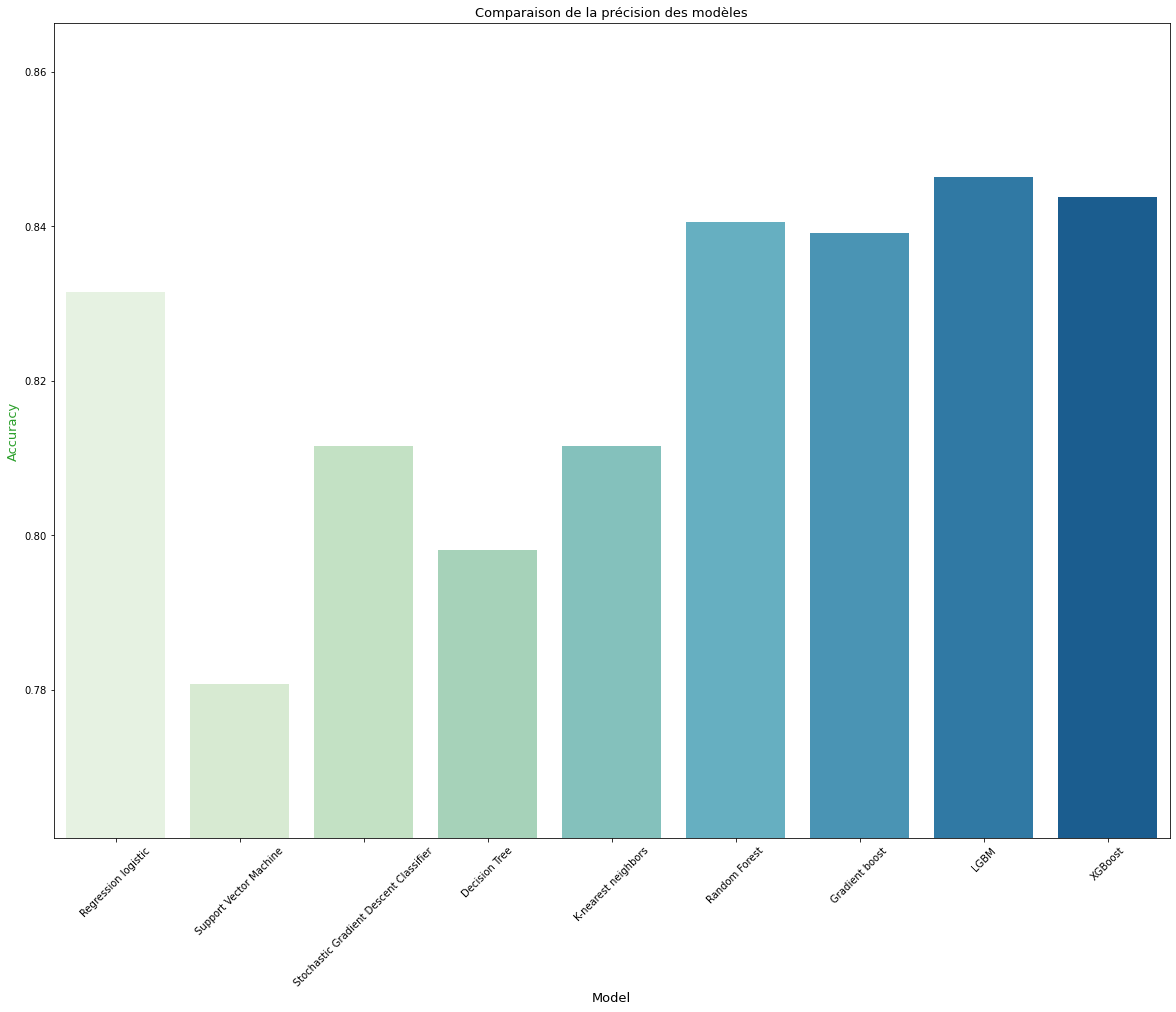

In [288]:
min = accuracy['Accuracy'].min() - 0.02
max = accuracy['Accuracy'].max() + 0.02

fig, ax1 = plt.subplots(figsize=(20,15))
ax1.set_title('Comparaison de la précision des modèles', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Modèles', fontsize=13)
ax1.set_ylabel('Précision', fontsize=13, color=color)
ax1 = sns.barplot(x='Model', y='Accuracy', data = accuracy, palette='GnBu')
plt.xticks(rotation=45)
ax1.set(ylim=(min, max))

### Conclusion

Les deux algorithmes qui sont les plus efficaces sont "LGBM" et "XG Booist". Mais le second est beaucoup plus lent. L'algorithme "LGBM" semble le plus adapté à ce problème.